In [3]:
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.datasets as datasets
from torchvision import transforms
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [5]:
labels_map = {0 : 'T-Shirt', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat', 5 : 'Sandal', 6 : 'Shirt',
              7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle Boot'};

In [6]:
train_dataset = datasets.FashionMNIST('fashion_data',
                        train=True,
                        transform=transforms.ToTensor(),
                        download=True)
test_dataset = datasets.FashionMNIST('fashion_data',
                        train=False,
                        transform=transforms.ToTensor(),
                        download=True)

In [7]:
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True);
test_loader = DataLoader(dataset=test_dataset,batch_size=batch_size, shuffle=True);

In [8]:
examples = enumerate(test_loader)
batch_idx, (images, labels) = next(examples)

In [9]:
images.shape

torch.Size([100, 1, 28, 28])

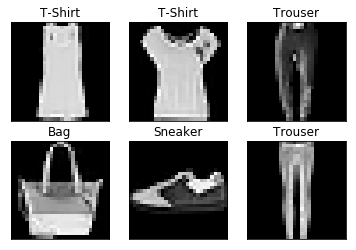

In [10]:
fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i][0], cmap='gray')
    label = labels[i].item()
    plt.title(labels_map[label])
    plt.xticks([])
    plt.yticks([])

In [11]:
class CNN(nn.Module):
    def __init__(self, num_class):
        super(CNN, self).__init__()
        
        self.layer1 = nn.Sequential(
            #depth=1, K=16, P=(5-1)/2, S=1, out=28x28x16 
            nn.Conv2d(1, 16, kernel_size=5, padding=2), 
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2)) #14x14x16
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2), #14x14x32
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2)) #7x7x32
        self.fc = nn.Linear(7*7*32, num_class)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

In [15]:
def train():
    model = CNN(len(labels_map))
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    ce_loss = nn.CrossEntropyLoss()
    
    losses = []
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
            images = Variable(images.float())
            labels = Variable(labels)
            
            outputs = model(images)
            loss = ce_loss(outputs, labels)
            loss.backward()
            optimizer.step()
        
            losses.append(loss.data[0]);
            
            if i%100 == 0:
                print('Loss: {%.4f} Epoch: {}/{}'.format(loss.item(), epoch, num_epochs))
    return model, losses

In [ ]:
def test(model):
    model.eval()
    correct = 0
    total = 0
    for image, label in test_loader:
        image = Variable(image.float())
        output = model(image)
        predicted = torch.argmax(output, dim=1)
        total += label.size(0)
        correct += np.sum(predicted == labels)
        accuracy = 100 * correct / total
        
    return accuracy

In [ ]:
model, losses = train()
accuracy = test(model)

In [ ]:
print('Accuracy: ', accuracy)

In [ ]:
plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('label')
plt.title('Loss over training steps')